# Projeto: Emissão Acústica Petrobras
## Laboratório de Processamento de Sinais - UFRJ
## Autor: Natanael Junior (natmourajr@lps.ufrj.br)

O objetivo deste notebook é a análise estatística dos dados bem como outras análise que podem ser úteis para o projeto

In [26]:
# Carregando dados
import scipy.io as sio
import numpy as np
mat_contents = sio.loadmat('../../Data/dadosCP2.mat')

inputMatrix = mat_contents['inputMatrix']
fieldNames = mat_contents['fieldNames']
freqPower = mat_contents['power']
normalizedfreqPower = mat_contents['normalizedPower']

feature_labels = []

for x1, x2 in enumerate(fieldNames):
    for y1, y2 in enumerate(x2):
        feature_labels = np.append(feature_labels,str(y2[0])) 


target_file = sio.loadmat('../../Data/targetCP2.mat')
target = target_file['targetCP2']

In [27]:
print 'inputMatrix: ',inputMatrix.shape
print 'power: ',freqPower.shape
print 'normalized Power: ',normalizedfreqPower.shape
print 'target: ',target.shape

inputMatrix:  (10, 1665)
power:  (32768, 1665)
normalized Power:  (32768, 1665)
target:  (3, 1665)


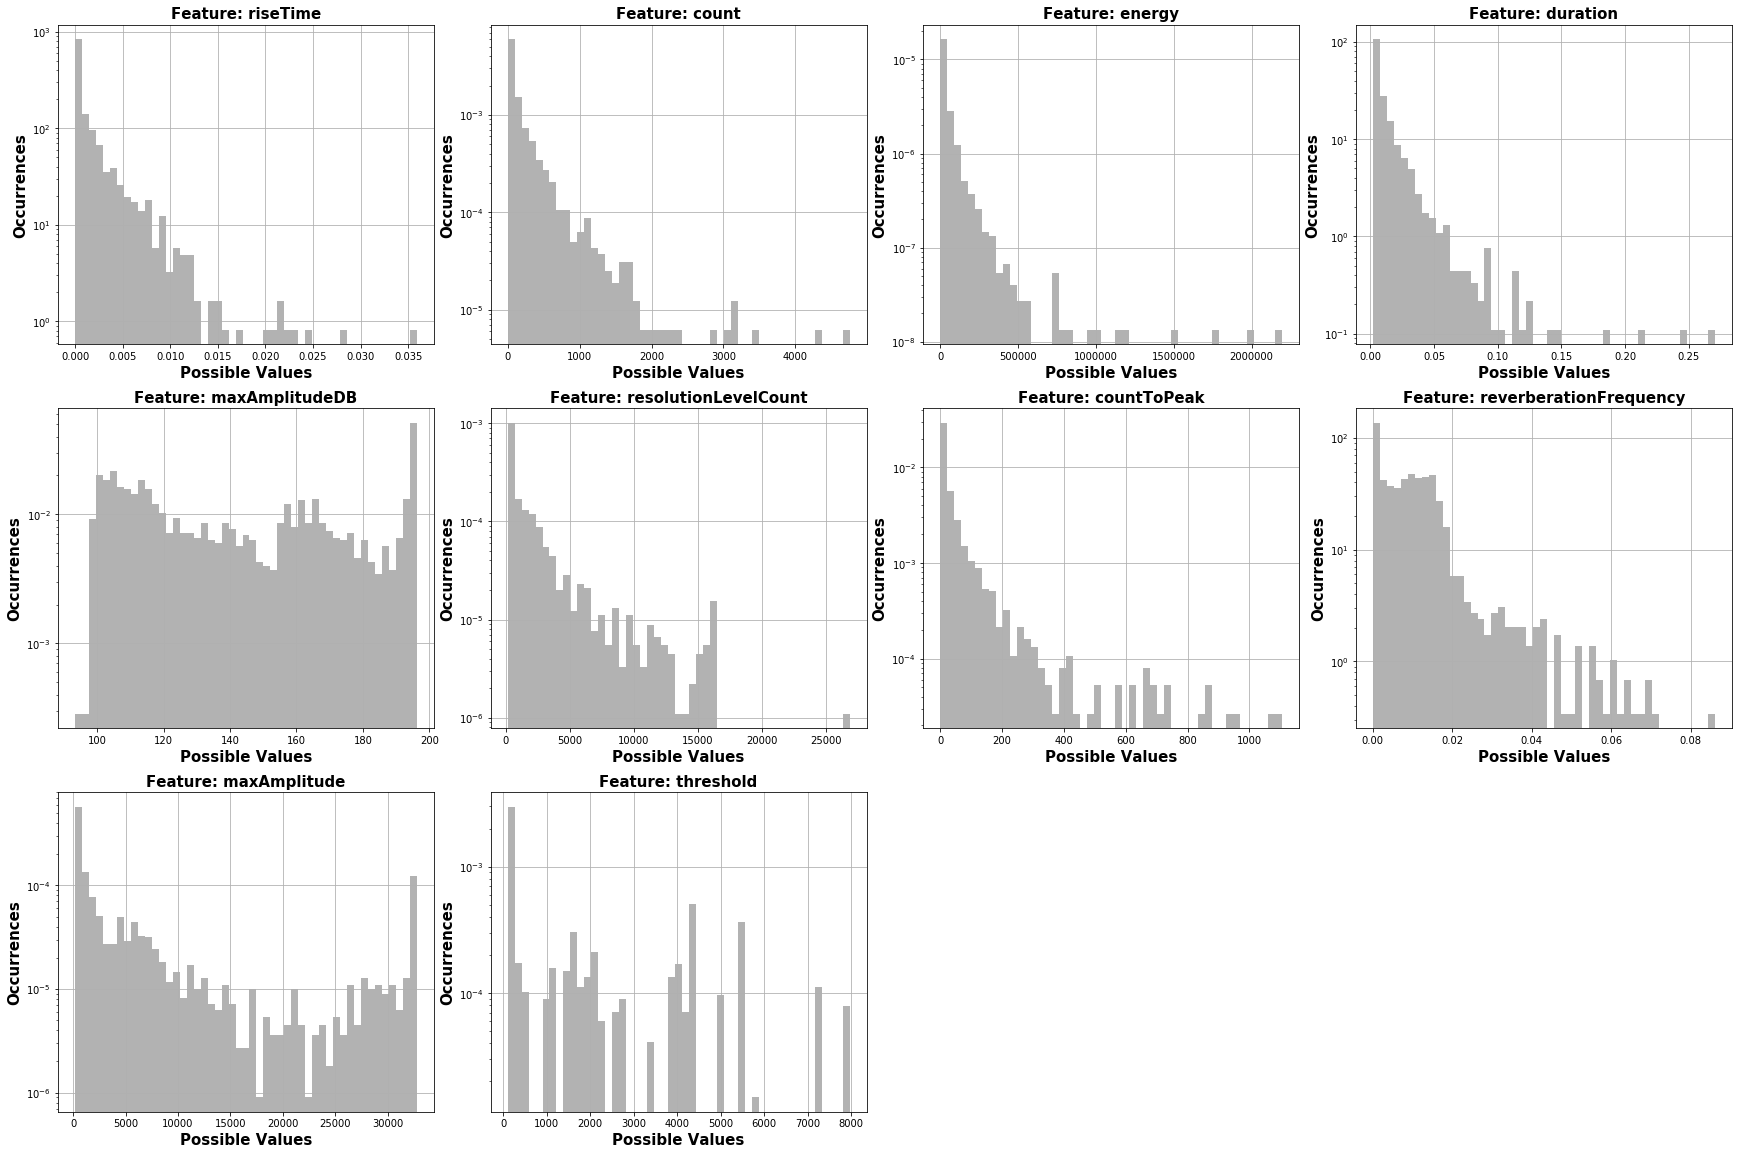

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

data = inputMatrix

nrows = 3
ncols = 4

#fig, subplot_array = plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,20))
fig = plt.figure(figsize=(30,20))

n_bins = 50

for label,var in enumerate(data):
    ax = plt.subplot(nrows,ncols,label+1)
    m_min,m_max = [var.min(),var.max()]
    m_bins = np.linspace(m_min.min(),m_max.max(),n_bins)
    n, bins, patches = (ax.hist(var,bins=m_bins,fc='k',
                                alpha=0.3, normed=1, log=True))
    ax.set_title('Feature: %s'%(feature_labels[label]),fontweight='bold',fontsize=15)
    ax.set_ylabel('Occurrences',fontweight='bold',fontsize=15)
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.set_xlabel('Possible Values',fontweight='bold',fontsize=15)
    ax.grid()
        
fig.subplots_adjust(wspace=0.15, hspace=0.2)
plt.savefig("../Results/param_input_log_dist.pdf", bbox_inches="tight")

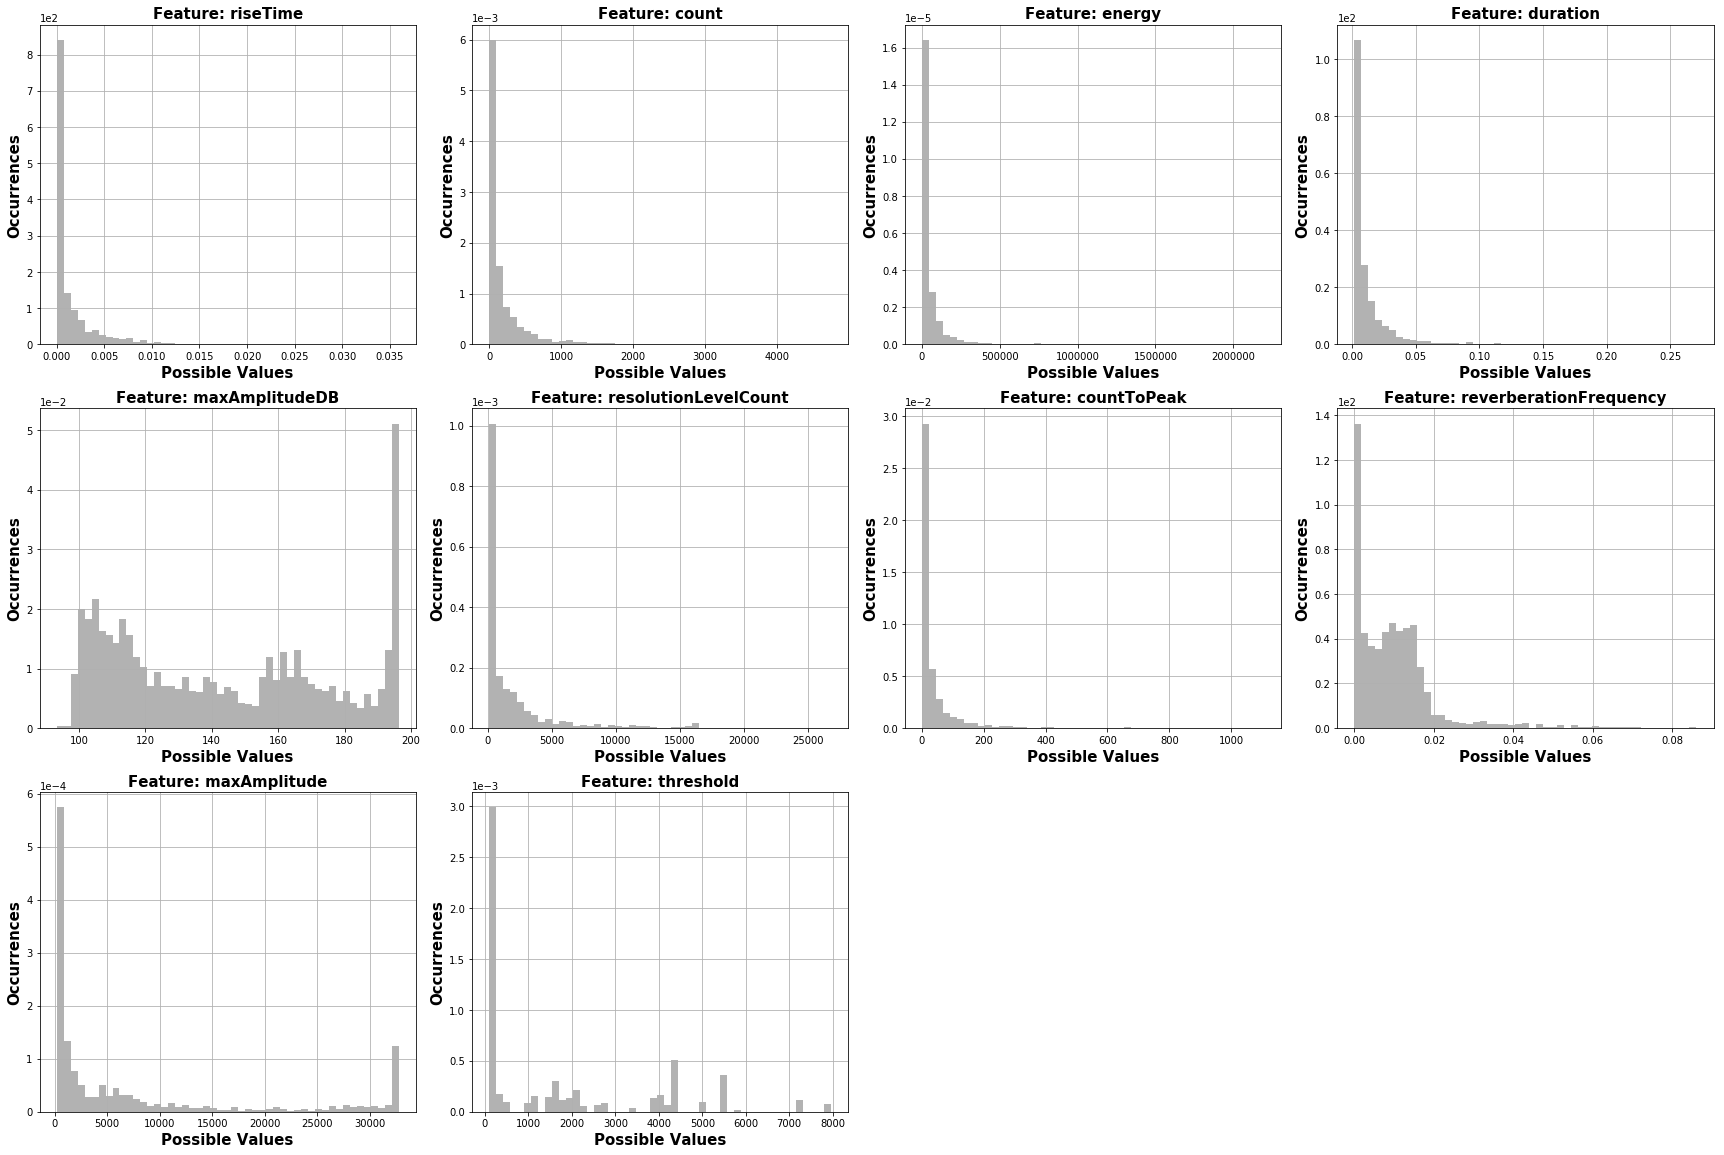

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

data = inputMatrix

nrows = 3
ncols = 4

#fig, subplot_array = plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,20))
fig = plt.figure(figsize=(30,20))
n_bins = 50

for label,var in enumerate(data):
    ax = plt.subplot(nrows,ncols,label+1)
    m_min,m_max = [var.min(),var.max()]
    m_bins = np.linspace(m_min.min(),m_max.max(),n_bins)
    n, bins, patches = (ax.hist(var,bins=m_bins,fc='k',
                                alpha=0.3, normed=1,))
    ax.set_title('Feature: %s'%(feature_labels[label]),fontweight='bold',fontsize=15)
    ax.set_ylabel('Occurrences',fontweight='bold',fontsize=15)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.set_xlabel('Possible Values',fontweight='bold',fontsize=15)
    ax.grid()
        
fig.subplots_adjust(wspace=0.15, hspace=0.2)
plt.savefig("../Results/param_input_dist.pdf", bbox_inches="tight")

Os histogramas não parecem apresentar nenhum padrão que possa ser utilizados durante o desenvolvimento. A princípio, os dados parecem não conter padrões de interesse

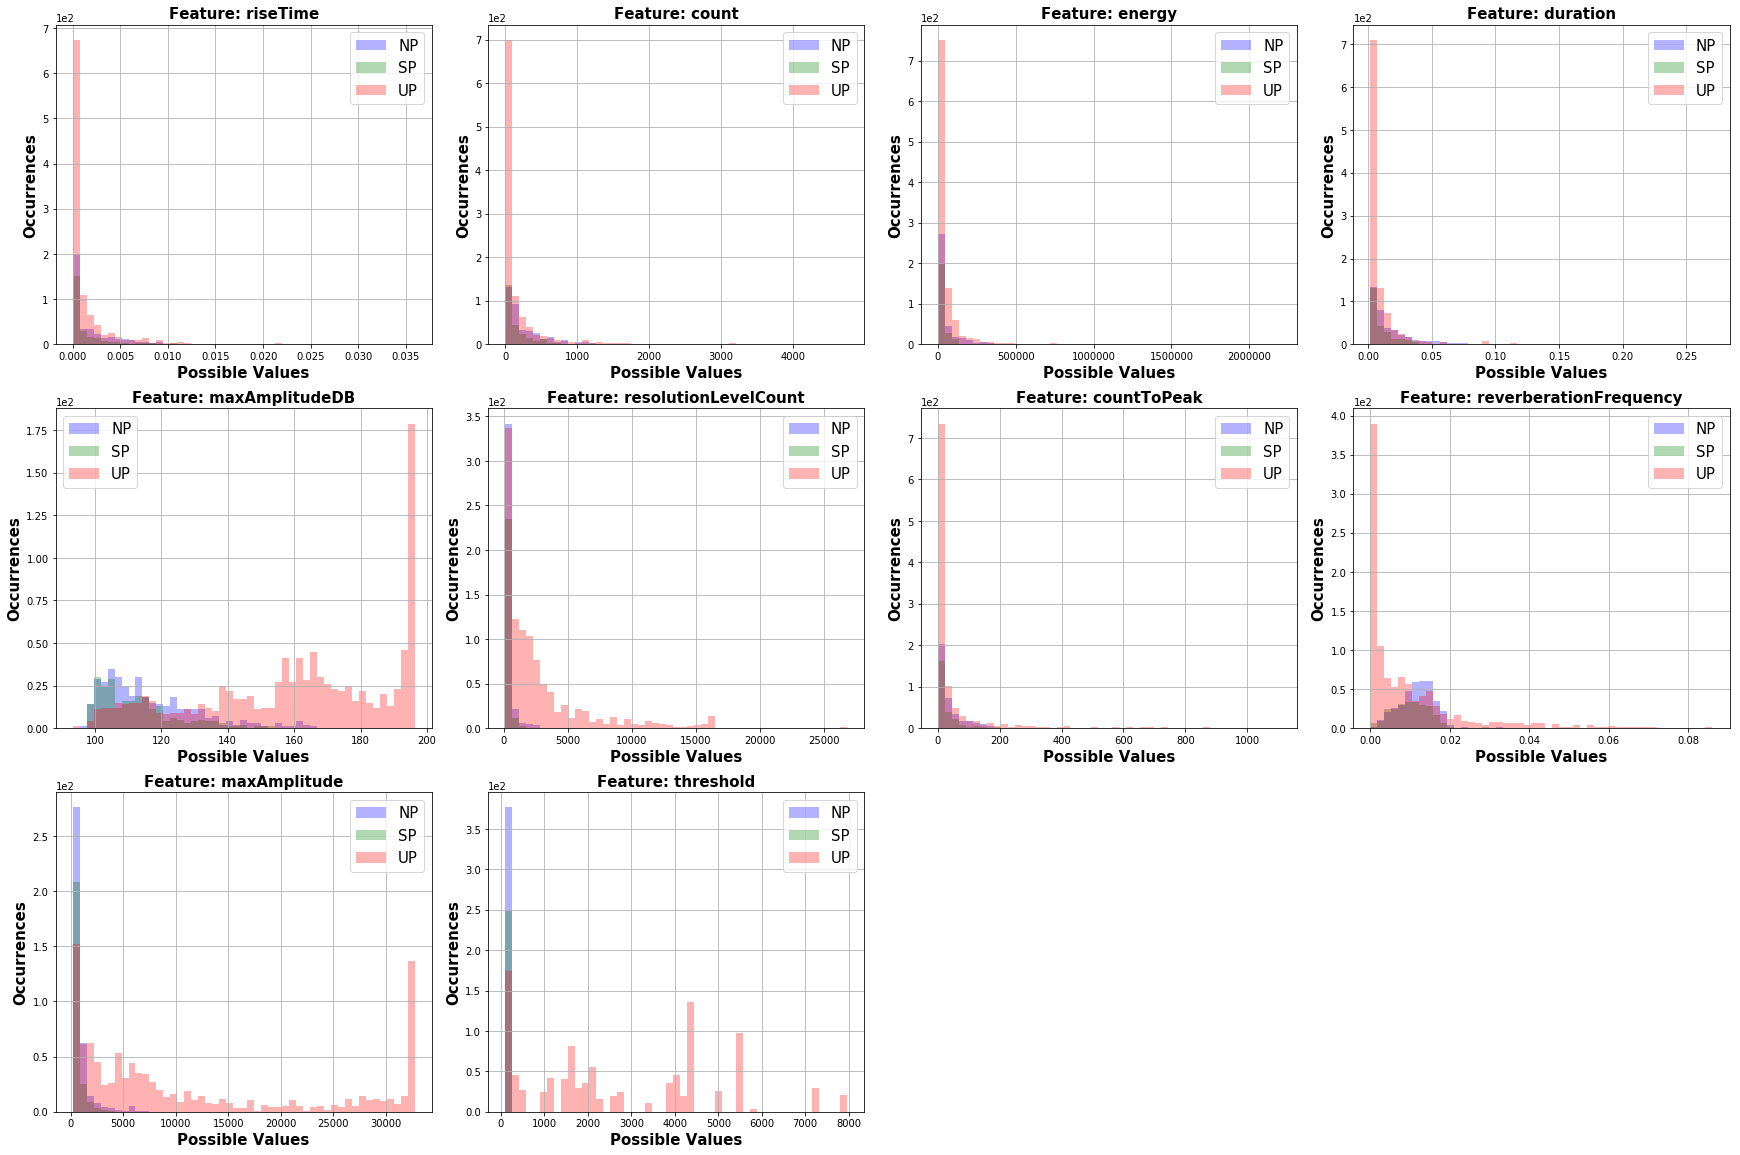

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

data = inputMatrix

nrows = 3
ncols = 4

#fig, subplot_array = plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,20))
fig = plt.figure(figsize=(30,20))

m_colors = ['b', 'g', 'r']
class_labels = ['NP', 'SP', 'UP']

num_target = np.argmax(target,axis=0)

n_bins = 50

for label,var in enumerate(data):
    ax = plt.subplot(nrows,ncols,label+1)
    m_min,m_max = [var.min(),var.max()]
    m_bins = np.linspace(m_min.min(),m_max.max(),n_bins)
    for iclass in np.arange(np.max(np.argmax(target,axis=0))+1):
         n, bins, patches = (ax.hist(var[num_target==iclass],bins=m_bins,fc=m_colors[iclass],
                                     alpha=0.3, label=class_labels[iclass]))
    ax.set_title('Feature: %s'%(feature_labels[label]),fontweight='bold',fontsize=15)
    ax.set_ylabel('Occurrences',fontweight='bold',fontsize=15)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.set_xlabel('Possible Values',fontweight='bold',fontsize=15)
    ax.grid()
    ax.legend(loc='best', fontsize=15)
fig.subplots_adjust(wspace=0.15, hspace=0.2)
plt.savefig("../Results/param_input_with_target_dist.pdf", bbox_inches="tight")

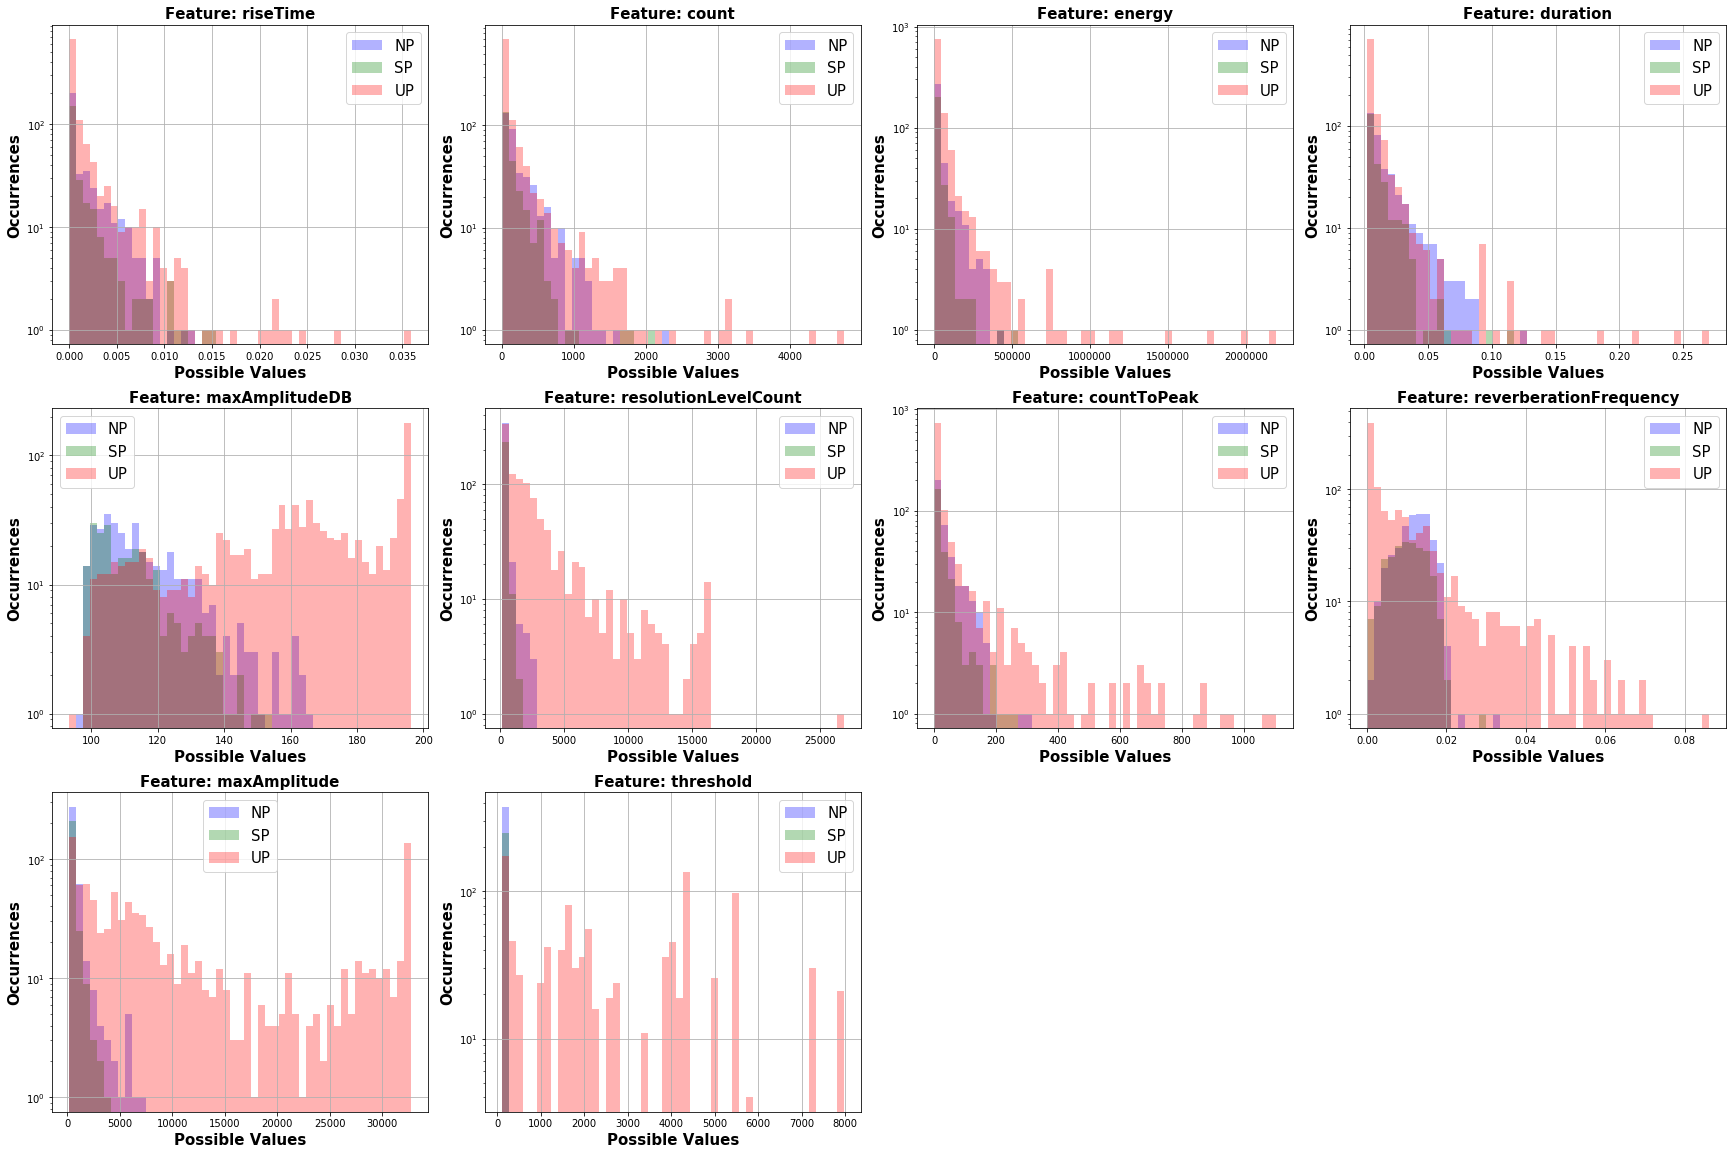

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

data = inputMatrix

nrows = 3
ncols = 4

#fig, subplot_array = plt.subplots(nrows=nrows, ncols=ncols,figsize=(20,20))
fig = plt.figure(figsize=(30,20))

m_colors = ['b', 'g', 'r']
class_labels = ['NP', 'SP', 'UP']

num_target = np.argmax(target,axis=0)

n_bins = 50

for label,var in enumerate(data):
    ax = plt.subplot(nrows,ncols,label+1)
    m_min,m_max = [var.min(),var.max()]
    m_bins = np.linspace(m_min.min(),m_max.max(),n_bins)
    for iclass in np.arange(np.max(np.argmax(target,axis=0))+1):
         n, bins, patches = (ax.hist(var[num_target==iclass],bins=m_bins,fc=m_colors[iclass],
                                     alpha=0.3, label=class_labels[iclass],log=True))
    ax.set_title('Feature: %s'%(feature_labels[label]),fontweight='bold',fontsize=15)
    ax.set_ylabel('Occurrences',fontweight='bold',fontsize=15)
    #ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax.set_xlabel('Possible Values',fontweight='bold',fontsize=15)
    ax.grid()
    ax.legend(loc='best', fontsize=15)
fig.subplots_adjust(wspace=0.15, hspace=0.2)
plt.savefig("../Results/param_log_input_with_target_dist.pdf", bbox_inches="tight")

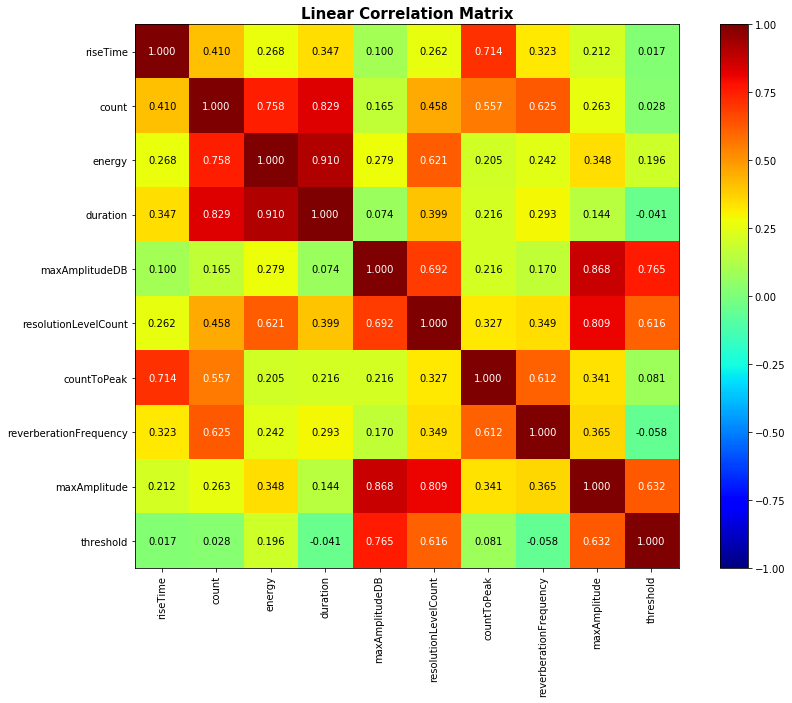

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#data = np.concatenate((inputMatrix,freqPower),axis=0)
data = inputMatrix
cm = np.corrcoef(data)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_aspect(1)

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.jet,clim=(-1.0, 1.0))

fig.colorbar(im)

width, height = cm.shape

for x in xrange(width):
    for y in xrange(height):
        if cm[x][y] < 0.5:
            ax.annotate('%1.3f'%(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
        else:
            ax.annotate('%1.3f'%(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='white')

ax.set_title('Linear Correlation Matrix',fontweight='bold',fontsize=15)
tick_marks = np.arange(len(feature_labels))
ax.xaxis.set_ticks(tick_marks)
ax.xaxis.set_ticklabels(feature_labels, rotation=90)
ax.yaxis.set_ticks(tick_marks)
ax.yaxis.set_ticklabels(feature_labels)

plt.savefig("../Results/param_input_linear_autocorr.pdf", bbox_inches="tight")

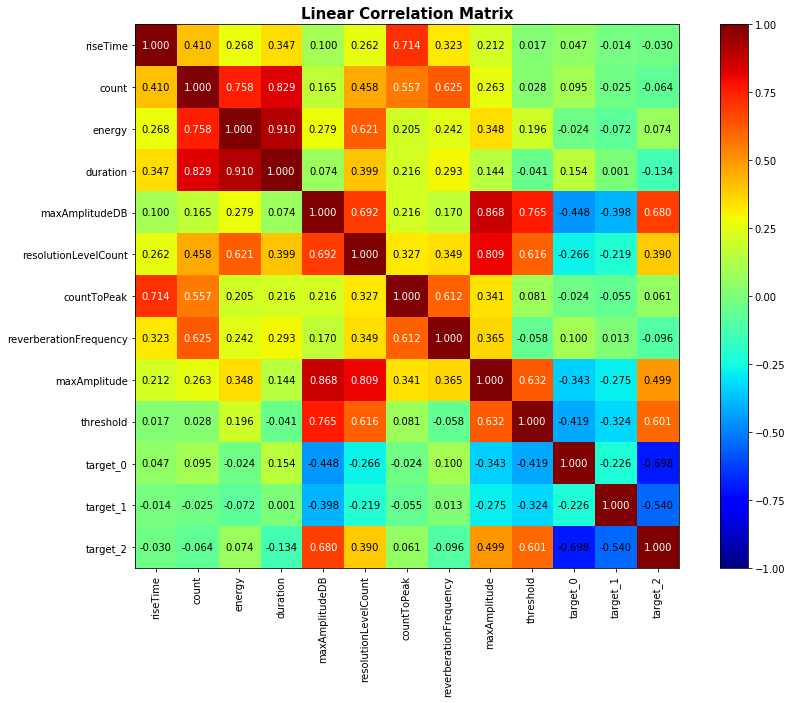

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

#data = np.concatenate((inputMatrix,freqPower),axis=0)
data = inputMatrix
data = np.append(data,target,axis=0)

labels = feature_labels
labels = np.append(labels,['target_0', 'target_1','target_2'])

cm = np.corrcoef(data)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_aspect(1)

im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.jet,clim=(-1.0, 1.0))

fig.colorbar(im)

width, height = cm.shape

for x in xrange(width):
    for y in xrange(height):
        if cm[x][y] < 0.5:
            ax.annotate('%1.3f'%(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
        else:
            ax.annotate('%1.3f'%(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',color='white')

ax.set_title('Linear Correlation Matrix',fontweight='bold',fontsize=15)
tick_marks = np.arange(len(labels))
ax.xaxis.set_ticks(tick_marks)
ax.xaxis.set_ticklabels(labels, rotation=90)
ax.yaxis.set_ticks(tick_marks)
ax.yaxis.set_ticklabels(labels)
plt.savefig("../Results/param_input_autocorr_with_target.pdf", bbox_inches="tight")

Quando fui tentar fazer a análise para os dados espectrais em uma máquina de bancada, a máquina travou. Provavelmente, preciso de mais memória para rodar isso. Vou tentar com mais calma mais tarde.